# Лабораторна робота №5. Алгоритми пошуку. Стратегія "грубої сили". (short version)

Виконав - Огоновський Олександр

**Мета**:  Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінки їх складності.


## Лінійний пошук

In [1]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

search_item = int(input("Введіть шуканий елемент: "))
a = [32, 1, 3, 4, 2, 1]
linear_search(a, search_item)

-1

### Оцінити асимптотичну складність алгоритму лінійного пошуку у О-нотації.

|час| |
|---|-|
|C1|1|
|C2|n|
|C3|n|
|C4|1|


У найгіршому випадку: $T(n) = C_1 + C_2 n + C_3 n + C_4 = O(n)$

## Бінарний пошук

In [2]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else: # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

a = range(7,21)

search_item = int(input("Введіть шуканий елемент: "))

bin_search(a, search_item, 0, len(a) - 1)

-1

### Оцінити асимптотичну складність алгоритму бінарного пошуку пошуку у О-нотації.

Це рекурсивний алгоритм. Вирішуємо його за основною теоремою рекурсії

$F(n) = \begin{cases}
    O(n^d), якщо d > log_b a \\
    O(n^d log n), якщо d = log_b a \\
    O(n^{log_b a}), якщо d < log_b a
\end{cases}$

$T(n) = T({{n} \over {2}}) + O(1)$

a = 1; b = 2; d = 0

$O < log_2 1$

$T(n) = O(n^o log n) = O(log n)$ у найгіршому випадку

T(n) = O(1) - Якщо елемент по середені

## Оцінка ефективності алгоритмів

- написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де n -- розмір масиву для функції `linear_searh();
- написати функцію, яка б могла повертати датафрейм з наступним складом полів: ("n", "time"), де n -- розмір масиву для функції `bin_searh();
- за результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.

### Бенчмарк для лінійного пошуку

In [14]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1
    
def benchmark_linear_search(sizes,repeats=5):
    results = []
    for n in sizes:
        total_time = 0
        for _ in range(repeats):
            arr = [random.randint(0, 100000) for _ in range(n)]
            target = arr[-1]  # найгірший випадок — останній елемент
            start = time.perf_counter()
            linear_search(arr, target)
            end = time.perf_counter()
            total_time += (end - start)
        avg_time = total_time / repeats
        results.append({'n': n, 'time': avg_time})
    return pd.DataFrame(results)

### Бенчмарк для бінарного пошуку

In [12]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:  # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

def benchmark_bin_search(sizes):
    data = []
    for n in sizes:
        arr = sorted(random.randint(0, 100000) for _ in range(n))
        x = random.choice(arr)  # елемент, який точно є

        start_time = time.perf_counter()
        bin_search(arr, x, 0, len(arr) - 1)
        end_time = time.perf_counter()

        elapsed = end_time - start_time
        data.append({'n': n, 'time': elapsed})

    return pd.DataFrame(data)

### графік залежності часу виконання процедури пошуку від розміру масиву

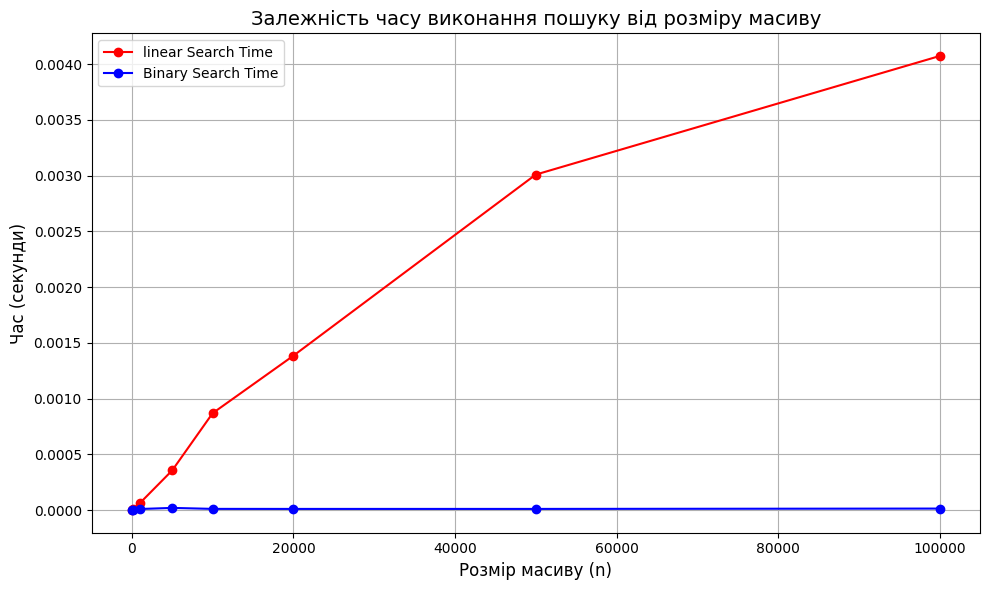

In [16]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Розміри масивів
sizes = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000]

# Отримання даних
df_bin1 = benchmark_bin_search(sizes)
df_bin2 = benchmark_linear_search(sizes)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(df_bin2['n'], df_bin2['time'],'o-',  color='red', label='linear Search Time')
plt.plot(df_bin1['n'], df_bin1['time'],'o-',  color='blue', label='Binary Search Time')


plt.title('Залежність часу виконання пошуку від розміру масиву', fontsize=14)
plt.xlabel('Розмір масиву (n)', fontsize=12)
plt.ylabel('Час (секунди)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

Для малих розмірів списку лінійний пошук може бути швидшим, ніж бінарний, тому що не потрібна попередня робота для сортування списку. Однак, коли розмір списку зростає, бінарний пошук стає значно швидшим. В цілому, бінарний пошук ефективніший для великих розмірів задачі, тоді як лінійний пошук може бути ефективнішим для малих розмірів задачі.

## Контрольні питання

1. **Надати визначення складності задачі із символом Ω.**
Ω-нотація описує найкращу можливу асимптотику алгоритму, тобто мінімальний час, який потрібен для виконання задачі. Якщо ми говоримо, що складність алгоритму є Ω(f(n)), то це означає, що для великих значень n час виконання алгоритму буде не меншим за f(n).

2. **Функція часової складності має вигляд: $F(N) = N^3 + 7N^2 − 14N$. Як записати асимптотичну складність у O-нотації?**
Складність цієї функції в O-нотації буде $O(N^3)$, оскільки найбільший степінь $N^3$ домінує для великих значень N.

3. **Функція часової складності має вигляд: $F(N) = 1.01N + N^{10}$. Як записати асимптотичну складність у O-нотації?**
Складність цієї функції в O-нотації буде $O(N^{10})$, оскільки найбільший степінь $N^{10}$ домінує для великих значень N.

4. **Функція часової складності має вигляд: $F(N) = N^{1.3} + 10 \log_2(N)$. Як записати асимптотичну складність у O-нотації?**
Оскільки $N^{1.3}$ зростає швидше за $\log_2(N)$, складність буде $\log_2(N)$.

5. **У чому полягає ідея розпаралелювання обчислень і для чого вона використовується? Які з алгоритмів, наведених у цій лабораторній роботі, дозволяють можливість розпаралелювання?**
Розпаралелювання дозволяє виконувати кілька частин алгоритму одночасно на різних процесорах чи ядрах, що підвищує швидкість виконання. Алгоритми, які можна розпаралелити, це лінійний пошук, дані можна розділити на кілька частин і шукати потрібний елемент у кожній частині одночасно різними потоками, потім результати об’єднуються. Бінарний пошук - розпаралелювати важко або недоцільно.

6. **Які існують способи підвищення обчислювальної швидкості алгоритмів? Який з них є найефективнішим?**
Основні способи підвищення швидкості включають паралелізацію, використання більш ефективних алгоритмів, кешування та оптимізацію коду. Найефективнішим є вибір оптимальних алгоритмів, таких як бінарний пошук замість лінійного пошуку.